In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
df = pd.read_csv('income.csv')
df.head(10)

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [2]:
scaler = MinMaxScaler()
scaler.fit(df[['Age']])
df[['Age']] = scaler.transform(df[['Age']])

scaler.fit(df[['Income($)']])
df[['Income($)']] = scaler.transform(df[['Income($)']])
df.head(10)

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436
5,Gautam,0.764706,0.940171
6,David,0.882353,0.982906
7,Andrea,0.705882,1.000000
8,Brad,0.588235,0.948718
9,Angelina,0.529412,0.726496


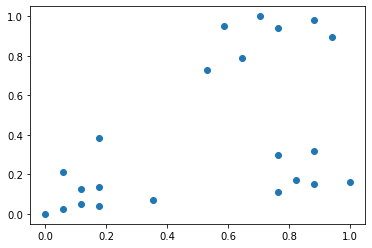

In [3]:
plt.scatter(df['Age'], df['Income($)'])

In [13]:
k_range = range(1, 11)
sse = []
for k in k_range:
    kmc = KMeans(n_clusters=k)
    kmc.fit(df[['Age', 'Income($)']])
    sse.append(kmc.inertia_)


C:\Users\Aruna Ravi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


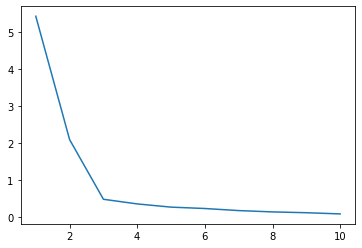

In [14]:
plt.xlabel = 'Number of Clusters'
plt.ylabel = 'Sum of Squared Errors'
plt.plot(k_range, sse)

In [15]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [16]:
y_predict = km.fit_predict(df[['Age', 'Income($)']])
y_predict

array([2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0])

In [17]:
df['cluster'] = y_predict
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


In [18]:
df0 = df[df.cluster == 0]
df0

,Name,Age,Income($),cluster
16,Dipika,0.823529,0.170940,0
17,Priyanka,0.882353,0.153846,0
18,Nick,1.000000,0.162393,0
19,Alia,0.764706,0.299145,0
20,Sid,0.882353,0.316239,0
21,Abdul,0.764706,0.111111,0


In [19]:
df1 = df[df.cluster == 1]
df1

,Name,Age,Income($),cluster
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1
10,Donald,0.647059,0.786325,1


In [21]:
df2 = df[df.cluster == 2]
df2

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
11,Tom,0.000000,0.000000,2
12,Arnold,0.058824,0.025641,2
13,Jared,0.117647,0.051282,2
14,Stark,0.176471,0.038462,2
15,Ranbir,0.352941,0.068376,2


In [23]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428]])

TypeError: 'str' object is not callable

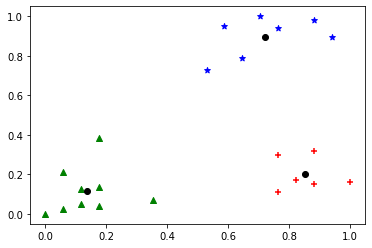

In [24]:
p1 = plt.scatter(df0['Age'], df0['Income($)'], marker='+', color='red')
p2 = plt.scatter(df1['Age'], df1['Income($)'], marker='*', color='blue')
p3 = plt.scatter(df2['Age'], df2['Income($)'], marker='^', color='green')
c = plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend((p1, p2, p3, c),
          ('Cluster 1', 'Cluster 2', 'Cluster 3', 'Centroid'))